# BI-PRS Semestral project 3
# Analysis of the gross domestic product per capita of European countries in 2012

### Task parameter

Group representative - Rafael Galiev 16.04.2003

In [1]:
K = 16
L = 6

In [2]:
M = ((K+L)*47) %% 11 + 1
M

[1] 1

So we will be working with data of the year 2011 + 1 = 2012

---

### Data Preparation

In [3]:
library(eurostat)

In [4]:
df <- suppressMessages(get_eurostat("nama_10_pc"))
head(df)

freq,unit,na_item,geo,TIME_PERIOD,values
<chr>,<chr>,<chr>,<chr>,<date>,<dbl>
A,CLV10_EUR_HAB,B1GQ,AL,1995-01-01,1310
A,CLV10_EUR_HAB,B1GQ,AL,1996-01-01,1410
A,CLV10_EUR_HAB,B1GQ,AL,1997-01-01,1270
A,CLV10_EUR_HAB,B1GQ,AL,1998-01-01,1390
A,CLV10_EUR_HAB,B1GQ,AL,1999-01-01,1580
A,CLV10_EUR_HAB,B1GQ,AL,2000-01-01,1700


In [5]:
# we need only the data in market prices and euros per inhabitant
df <- df[df$unit == "CP_EUR_HAB", ]
df <- df[df$na_item == "B1GQ", ]

In [6]:
df_2012 <- df[format.Date(df$TIME_PERIOD, "%Y") == "2012",]
head(df_2012)

freq,unit,na_item,geo,TIME_PERIOD,values
<chr>,<chr>,<chr>,<chr>,<date>,<dbl>
A,CP_EUR_HAB,B1GQ,AL,2012-01-01,3300
A,CP_EUR_HAB,B1GQ,AT,2012-01-01,37820
A,CP_EUR_HAB,B1GQ,BE,2012-01-01,34770
A,CP_EUR_HAB,B1GQ,BG,2012-01-01,5780
A,CP_EUR_HAB,B1GQ,CH,2012-01-01,66780
A,CP_EUR_HAB,B1GQ,CY,2012-01-01,22570


In [7]:
# make sure that we can securely delete the TIME_PERIOD and freq columns
unique(df_2012$freq)
unique(df_2012$TIME_PERIOD)

[1] "A"

[1] "2012-01-01"

In [8]:
# from the original data, we only need the geo and values columns
df_2012 <- subset(df_2012, select = c("geo", "values"))

In [9]:
df_2012_labeled <- label_eurostat(df_2012)

In [10]:
# we will save the labeled data in a new column
df_2012$label <- df_2012_labeled$geo

In [11]:
head(df_2012)

geo,values,label
<chr>,<dbl>,<chr>
AL,3300,Albania
AT,37820,Austria
BE,34770,Belgium
BG,5780,Bulgaria
CH,66780,Switzerland
CY,22570,Cyprus


In [12]:
unique(df_2012$geo)

[1] "AL"        "AT"        "BE"        "BG"        "CH"        "CY"       
 [7] "CZ"        "DE"        "DK"        "EA"        "EA12"      "EA19"     
[13] "EA20"      "EE"        "EL"        "ES"        "EU15"      "EU27_2020"
[19] "EU28"      "FI"        "FR"        "HR"        "HU"        "IE"       
[25] "IS"        "IT"        "LT"        "LU"        "LV"        "ME"       
[31] "MK"        "MT"        "NL"        "NO"        "PL"        "PT"       
[37] "RO"        "RS"        "SE"        "SI"        "SK"        "TR"       
[43] "UK"

In [13]:
df_2012[df_2012$geo == "EU15",]$label
df_2012[df_2012$geo == "EA12",]$label
df_2012[df_2012$geo == "EA",]$label

[1] "European Union - 15 countries (1995-2004)"

[1] "Euro area - 12 countries (2001-2006)"

[1] "Euro area (EA11-1999, EA12-2001, EA13-2007, EA15-2008, EA16-2009, EA17-2011, EA18-2014, EA19-2015, EA20-2023)"

In our dataset there are data on the Eurozone as a whole for different periods of time, for further analysis we will remove them, as we want to consider individual states

In [14]:
# print and remove rows where the country code has more than 2 characters and EA
df_2012[(nchar(df_2012$geo) > 2) | (df_2012$geo == "EA"), ]
df_2012 <- df_2012[(nchar(df_2012$geo) == 2) & (df_2012$geo != "EA"), ]

geo,values,label
<chr>,<dbl>,<chr>
EA,29510,"Euro area (EA11-1999, EA12-2001, EA13-2007, EA15-2008, EA16-2009, EA17-2011, EA18-2014, EA19-2015, EA20-2023)"
EA12,29950,Euro area - 12 countries (2001-2006)
EA19,29230,Euro area - 19 countries (2015-2022)
EA20,29000,Euro area – 20 countries (from 2023)
EU15,31040,European Union - 15 countries (1995-2004)
EU27_2020,25770,European Union - 27 countries (from 2020)
EU28,26700,European Union - 28 countries (2013-2020)


In [15]:
unique(df_2012$geo)

[1] "AL" "AT" "BE" "BG" "CH" "CY" "CZ" "DE" "DK" "EE" "EL" "ES" "FI" "FR" "HR"
[16] "HU" "IE" "IS" "IT" "LT" "LU" "LV" "ME" "MK" "MT" "NL" "NO" "PL" "PT" "RO"
[31] "RS" "SE" "SI" "SK" "TR" "UK"

Now we only have data on individual countries

---

## Task 1:

### Basic statistical analysis

In [16]:
summary(df_2012$values)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3300   10388   17585   25580   36658   87540 

In [17]:
sd <- sd(df_2012$values)
print(sd, round = 2)

[1] 20626.14


Above we see that minimum value of the GDP per capita is 3300 and maximum value is 87540. The mean value is 25580 and median value is 17585. The first quartile is 10388 and the third quartile is 36658. The standard deviation is 20626.14. The distribution of GDP per capita is right-skewed.

In [18]:
library(ggplot2)

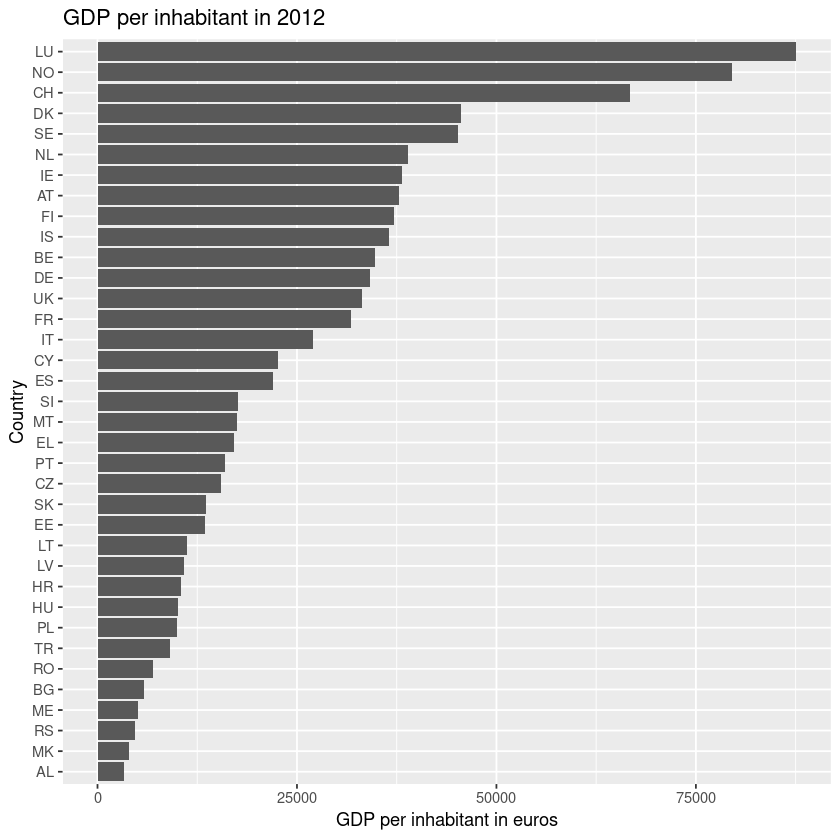

In [19]:
# show the plot of the GDP per inhabitant
ggplot(df_2012, aes(x = reorder(geo, values), y = values)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(title = "GDP per inhabitant in 2012",
       x = "Country",
       y = "GDP per inhabitant in euros")

From the plot we see that the highest GDP per capita is in Luxembourg, Norway, and Switzerland. The lowest GDP per capita is in Albania, North Macedonia and Serbia. Generally, the GDP per capita is higher in the western part of Europe.

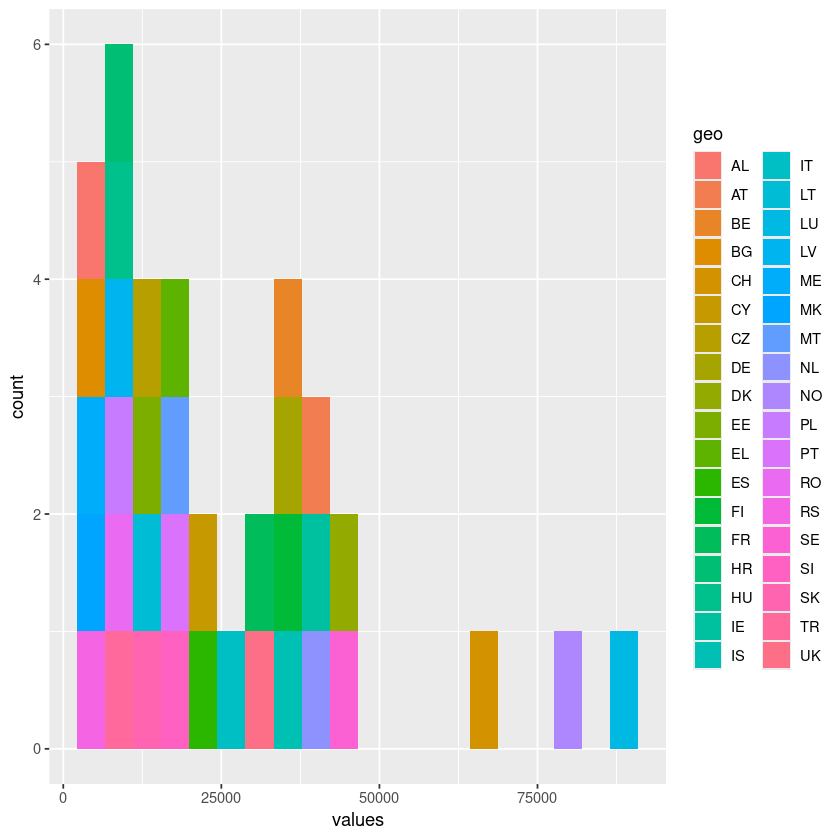

In [20]:
ggplot(df_2012, aes(x = values, fill = geo)) + geom_histogram(bins = 20)

Most countries cluster around lower GDP values, primarily between 0 and 50,000 euros per capita. The distribution shows several peaks, indicating distinct groups of countries with different economic levels. A few countries(Luxembourg, Norway, Switzerland) exhibit significantly higher GDP per capita, highlighting economic disparities within Europe. Factors influencing these variations include economic development, demographic characteristics, and geographic conditions.

In [21]:
library(ggplot2)
library(sf)
library(rnaturalearth)
library(rnaturalearthdata)
library(dplyr)
library(viridis)

Linking to GEOS 3.10.2, GDAL 3.4.1, PROJ 8.2.1; sf_use_s2() is TRUE


Attaching package: ‘rnaturalearthdata’


The following object is masked from ‘package:rnaturalearth’:

    countries110



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: viridisLite



In [22]:
# load data
world <- ne_countries(scale = "medium", returnclass = "sf")

In [23]:
# extract values
df <- data.frame(
  geo = df_2012$geo,
  values = df_2012$values
)

In [24]:
# Create a mapping between two-letter and three-letter country codes
country_codes <- c(
  AL = "ALB", AT = "AUT", BE = "BEL", BG = "BGR", CH = "CHE", CY = "CYP", CZ = "CZE", DE = "DEU", DK = "DNK",
  EE = "EST", EL = "GRC", ES = "ESP", FI = "FIN", FR = "FRA", HR = "HRV", HU = "HUN", IE = "IRL", IS = "ISL",
  IT = "ITA", LT = "LTU", LU = "LUX", LV = "LVA", ME = "MNE", MK = "MKD", MT = "MLT", NL = "NLD", NO = "NOR",
  PL = "POL", PT = "PRT", RO = "ROU", RS = "SRB", SE = "SWE", SI = "SVN", SK = "SVK", TR = "TUR", UK = "GBR"
)

# conver codes
df$geo <- unname(country_codes[df$geo])

In [25]:
# Merge data with geographic information
world <- left_join(world, df, by = c("adm0_a3" = "geo"))

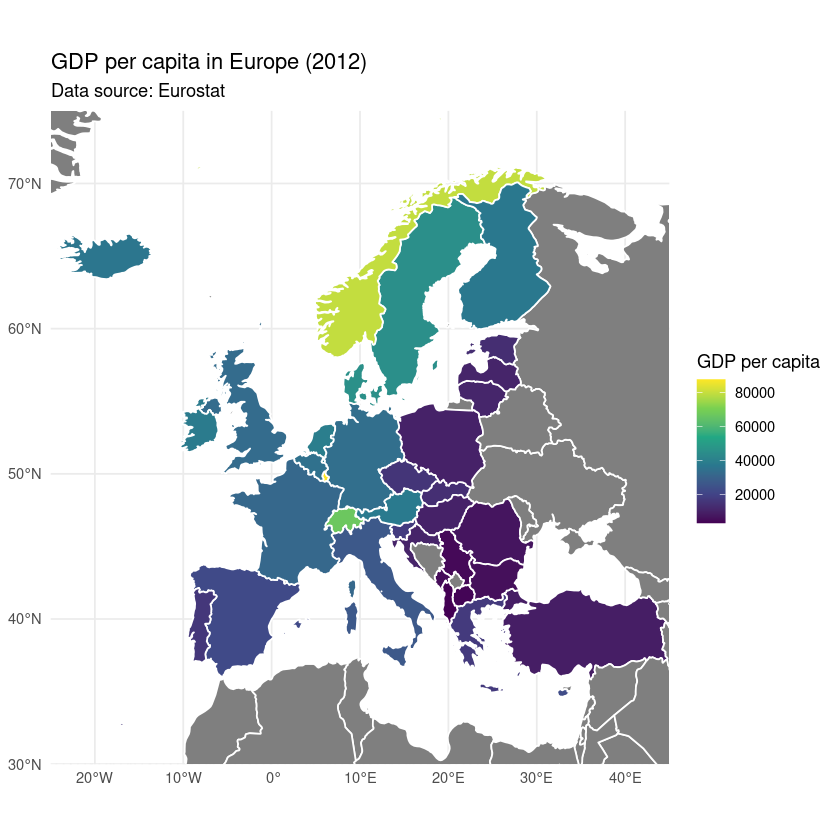

In [26]:
# Visualize the heatmap for Europe
ggplot(data = world) +
  geom_sf(aes(fill = values), color = "white", lwd = 0.5) +
  scale_fill_viridis_c(option = "viridis", na.value = "grey50", name = "GDP per capita") +
  theme_minimal() +
  labs(title = "GDP per capita in Europe (2012)",
       subtitle = "Data source: Eurostat",) +
  coord_sf(xlim = c(-25, 45), ylim = c(30, 75), expand = FALSE)

The graph shows the distribution of GDP per capita by European countries in 2012. It can be seen that Northern and Western European countries have the highest GDP per capita, while Eastern and Southern European countries have the lowest. This reflects the significant economic inequalities in the region.

> #### What data about countries can influence GDP per capita?
> - First of all, we can consider the population of the country. The GDP per capita is calculated as GDP divided by population. Generally, a larger population can lower the GDP per capita if the GDP doesn't increase proportionally.
> - Another factor can be the employment rate. Employment rate is the percentage of people of working age who are employed. Typically, employed people earn money and pay taxes.
> - Additionaly, we can consider the inflation rate. Inflation rate is the percentage increase in the price of goods and services. High inflation can reduce the GDP per capita because it lowers the purchasing power of income.
> - Education level is also an important factor. Higher education levels usually lead to a more skilled workforce, increased productivity, and ultimately a higher GDP per capita.
> - Finally, we can consider the division of countries into regions within Europe (Northern, Western, Eastern, Southern). This regional division helps to account for economic differences across Europe. Different regions might have varying levels of development, resources, and economic policies that can impact GDP per capita.


---

## Task 2:

> ##### Now let's load country population data for 2012 from the demo_pjan dataset from eurostat

In [27]:
pop <- suppressMessages(get_eurostat("demo_pjan"))
pop <- pop[pop$age == "TOTAL" & pop$sex == "T", ]
pop <- pop[format.Date(pop$TIME_PERIOD, "%Y") == "2012",]
pop <- subset(pop, select = c("geo", "values"))
head(pop)

geo,values
<chr>,<dbl>
AD,78115
AL,2903008
AM,3274285
AT,8408121
AZ,9235085
BA,3839265


> ##### Now let's load the employment data for the population aged 15-64 in percentages from the lfsi_emp_a eurostat dataset

In [28]:
emp <- suppressMessages(get_eurostat("lfsi_emp_a"))
emp <- emp[emp$indic_em == "EMP_LFS" & emp$age == "Y15-64" & emp$sex == "T" & emp$unit == "PC_POP", ]
emp <- emp[format.Date(emp$TIME_PERIOD, "%Y") == "2012",]
emp <- subset(emp, select = c("geo", "values"))
head(emp)

geo,values
<chr>,<dbl>
AT,71.4
BE,61.8
BG,58.0
CH,78.5
CY,64.6
CZ,66.5


> ##### Now let's load the inflation data from the prc_hicp_aind eurostat dataset

In [29]:
inf <- suppressMessages(get_eurostat("prc_hicp_aind"))
inf <- inf[inf$coicop == "CP00" & inf$unit == "RCH_A_AVG", ]
inf <- inf[format.Date(inf$TIME_PERIOD, "%Y") == "2012",]
inf <- subset(inf, select = c("geo", "values"))
head(inf)

geo,values
<chr>,<dbl>
AT,2.6
BE,2.6
BG,2.4
CH,-0.7
CY,3.1
CZ,3.5


> ##### Now let's load country's educational attainment level data for age group 15-64 years old in 2012 from edat_lfse_03 eurostat dataset

In [30]:
edu <- suppressMessages(get_eurostat("edat_lfse_03"))
edu <- edu[edu$sex == "T" & edu$age == "Y15-64", ]
edu <- edu[edu$isced11 == "ED5-8", ] # we are interested in tertiary education
edu <- edu[format.Date(edu$TIME_PERIOD, "%Y") == "2012",]
edu <- subset(edu, select = c("geo", "values"))
head(edu)

geo,values
<chr>,<dbl>
AT,16.9
BE,31.3
BG,20.7
CH,30.1
CY,35.0
CZ,17.0


> ##### Manually create a dataframe that contains information about which part of Europe the country belongs to

> - Source: United Nations Statistics Division, https://unstats.un.org/unsd/methodology/m49

In [31]:
region_europe <- data.frame(
  geo = c("AT", "BE", "BG", "HR", "CY", "CZ", "DK", "EE", "FI", "FR", "DE", "HU", "IE", "IT", "LV", "LT", "LU", "MT", "NL", "PL", "PT", "RO", "SK", "SI", "ES", "SE", "UK", "AL", "CH", "EL", "IS", "ME", "MK", "NO", "RS", "TR"),
  Region = c(
    "Western Europe",  # AT
    "Western Europe",  # BE
    "Eastern Europe",  # BG
    "Southern Europe", # HR
    "Southern Europe", # CY
    "Eastern Europe",  # CZ
    "Northern Europe", # DK
    "Northern Europe", # EE
    "Northern Europe", # FI
    "Western Europe",  # FR
    "Western Europe",  # DE
    "Eastern Europe",  # HU
    "Northern Europe", # IE
    "Southern Europe", # IT
    "Northern Europe", # LV
    "Northern Europe", # LT
    "Western Europe",  # LU
    "Southern Europe", # MT
    "Western Europe",  # NL
    "Eastern Europe",  # PL
    "Southern Europe", # PT
    "Eastern Europe",  # RO
    "Eastern Europe",  # SK
    "Southern Europe", # SI
    "Southern Europe", # ES
    "Northern Europe", # SE
    "Northern Europe", # UK
    "Southern Europe", # AL
    "Western Europe",  # CH
    "Southern Europe", # EL
    "Northern Europe", # IS
    "Southern Europe", # ME
    "Southern Europe", # MK
    "Northern Europe", # NO
    "Southern Europe", # RS
    "Southern Europe"  # TR
  )
)

head(region_europe)

,geo,Region
,<chr>,<chr>
1,AT,Western Europe
2,BE,Western Europe
3,BG,Eastern Europe
4,HR,Southern Europe
5,CY,Southern Europe
6,CZ,Eastern Europe


> ##### Let's merge all the data into one table and rename the columns

In [32]:
# rename the 'values' column in each data frame
names(df_2012)[names(df_2012) == "values"] <- "GDP"
names(edu)[names(edu) == "values"] <- "Education"
names(pop)[names(pop) == "values"] <- "Population"
names(emp)[names(emp) == "values"] <- "Employment"
names(inf)[names(inf) == "values"] <- "Inflation"

# merge all data frames
df_big <- merge(df_2012, edu, by = "geo", all.x = TRUE)
df_big <- merge(df_big, region_europe, by = "geo", all.x = TRUE)
df_big <- merge(df_big, pop, by = "geo", all.x = TRUE)
df_big <- merge(df_big, emp, by = "geo", all.x = TRUE)
df_big <- merge(df_big, inf, by = "geo", all.x = TRUE)

# reorder the columns
df_big <- df_big[, c("geo", "label", "GDP", "Population", "Employment", "Inflation", "Region", "Education")]

> ##### For a few countries there are missing data for some indicators, so we fill them manually using data from https://tradingeconomics.com.

In [33]:
df_big[df_big$geo == "AL", "Employment"] <- 51.1
df_big[df_big$geo == "AL", "Inflation"] <- 2.4
df_big[df_big$geo == "AL", "Education"] <- 21.7

df_big[df_big$geo == "ME", "Inflation"] <- 4.1

df_big[df_big$geo == "UK", "Employment"] <- 70.8

> ##### Let's look at the resulting table

In [34]:
df_big

geo,label,GDP,Population,Employment,Inflation,Region,Education
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
AL,Albania,3300,2903008,51.1,2.4,Southern Europe,21.7
AT,Austria,37820,8408121,71.4,2.6,Western Europe,16.9
BE,Belgium,34770,11075889,61.8,2.6,Western Europe,31.3
BG,Bulgaria,5780,7327224,58.0,2.4,Eastern Europe,20.7
CH,Switzerland,66780,7954662,78.5,-0.7,Western Europe,30.1
CY,Cyprus,22570,862011,64.6,3.1,Southern Europe,35.0
CZ,Czechia,15470,10505445,66.5,3.5,Eastern Europe,17.0
DE,Germany,34130,80327900,72.0,2.2,Western Europe,24.9
DK,Denmark,45530,5580516,71.0,2.4,Northern Europe,28.5


> #####  Let's evaluate the relevance of each regressor for predicting GDP per capita.

> - We will perform significance tests to determine which variables should be included in our model.

For numeric continuous variables we will use Spearman correlation test.
$H_0$: There is no monotonic relationship between the two variables. In other words, the Spearman correlation coefficient is zero.
$H_A$: There is a monotonic relationship between the two variables. In other words, the Spearman correlation coefficient is not zero.


In [35]:
cor.test(df_big$GDP, df_big$Education, method = "spearman")

Warning message in cor.test.default(df_big$GDP, df_big$Education, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  df_big$GDP and df_big$Education
S = 2703.4, p-value = 1.642e-05
alternative hypothesis: true rho is not equal to 0
sample estimates:
     rho 
0.652076 


> The p-value is less than 0.05, so we reject the null hypothesis. The calculated Spearman correlation coefficient is 0.652, indicating a significant moderate positive correlation between GDP and Education.

In [36]:
cor.test(df_big$GDP, df_big$Population, method = "spearman")


	Spearman's rank correlation rho

data:  df_big$GDP and df_big$Population
S = 7346, p-value = 0.7513
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
0.05456885 


> The p-value is greater than 0.05, so we fail to reject the null hypothesis. The calculated Spearman correlation coefficient is only 0.055, indicating a very weak and insignificant correlation between GDP and Population. Thus, Population is not a suitable regressor and will not be included in the model.

In [37]:
cor.test(df_big$GDP, df_big$Employment, method = "spearman")

Warning message in cor.test.default(df_big$GDP, df_big$Employment, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  df_big$GDP and df_big$Employment
S = 1526.2, p-value = 3.632e-09
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.8035783 


> The p-value is less than 0.05, so we reject the null hypothesis. The calculated Spearman correlation coefficient is 0.804, indicating a strong positive correlation between GDP and Employment. Thus, Employment is a suitable regressor and will be included in the model.

In [38]:
cor.test(df_big$GDP, df_big$Inflation, method = "spearman")

Warning message in cor.test.default(df_big$GDP, df_big$Inflation, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  df_big$GDP and df_big$Inflation
S = 11182, p-value = 0.007373
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.4391446 


> The p-value is less than 0.05, so we reject the null hypothesis. The calculated Spearman correlation coefficient is -0.439, indicating a moderate negative correlation between GDP and Inflation. Thus, Inflation is a suitable regressor and will be included in the model.

To investigate the relationship between the categorical variable Region and GDP we use the Kruskal test.
$H_0$ : The median GDP per capita is the same across all regions of Europe.
$H_A$ : The median GDP per capita is different for at least one region of Europe.

In [39]:
kruskal.test(df_big$GDP ~ df_big$Region)


	Kruskal-Wallis rank sum test

data:  df_big$GDP by df_big$Region
Kruskal-Wallis chi-squared = 19.256, df = 3, p-value = 0.0002421


> Since the p-value is significantly less than the conventional threshold of 0.05, we reject the null hypothesis. This indicates that there are significant differences in the median GDP per capita across the different regions of Europe.
> Even though the assumption of independence of GDP between neighboring countries might be violated (due to trade relations and economic interdependence), the significant result of the Kruskal-Wallis test suggests that the region is an important regressor. It is reasonable to keep the region as a regressor in the model.

---

> ##### Let's now consider the selected regressors in more detail

**Population**:

In [40]:
summary(df_big$Population)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
  319575  2692204  7271936 16800886 12497392 80327900 

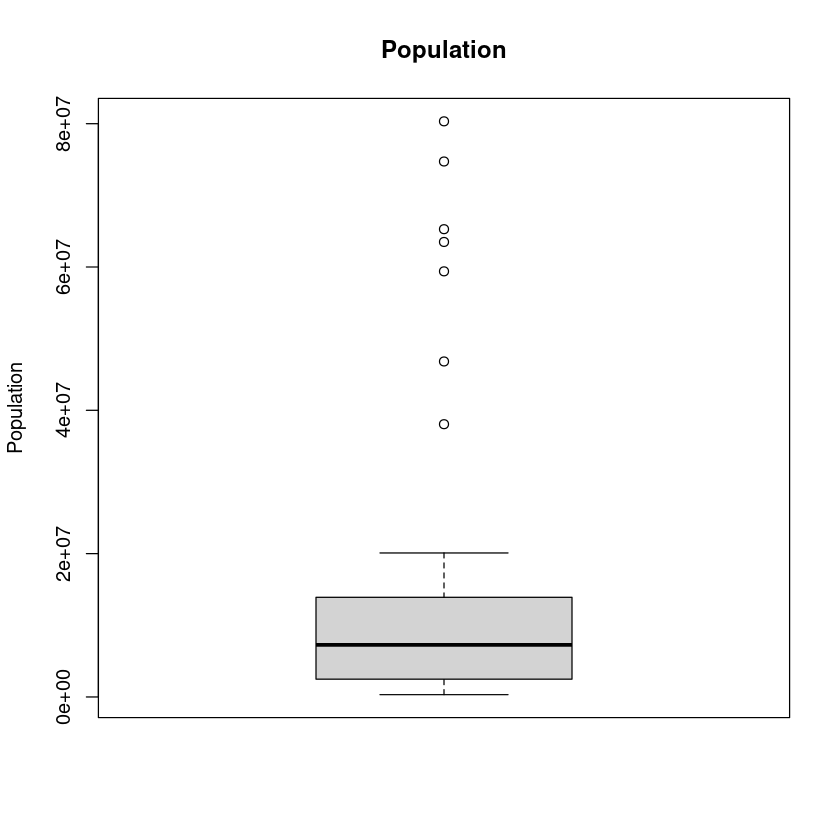

In [41]:
boxplot(df_big$Population, main = "Population", ylab = "Population")

The summary statistics and the boxplot for the *Population* variable show that there is a wide range in the population sizes of the countries. The mean is significantly larger than the median, indicating a positive skew in the data. This suggests that there are some countries with exceptionally high populations that are pulling the mean upwards.  
The boxplot visually confirms this interpretation, showing several outliers on the higher end of the population range.

**Employment**:

In [42]:
summary(df_big$Employment)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  44.00   56.02   61.90   62.18   69.00   79.70 

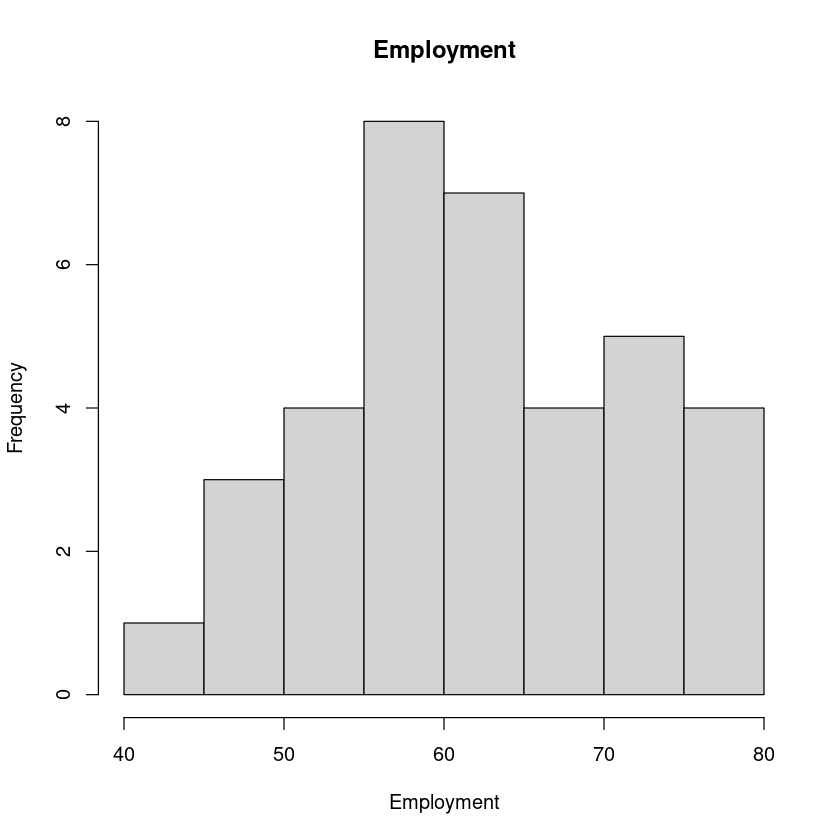

In [43]:
hist(df_big$Employment, main = "Employment", xlab = "Employment")

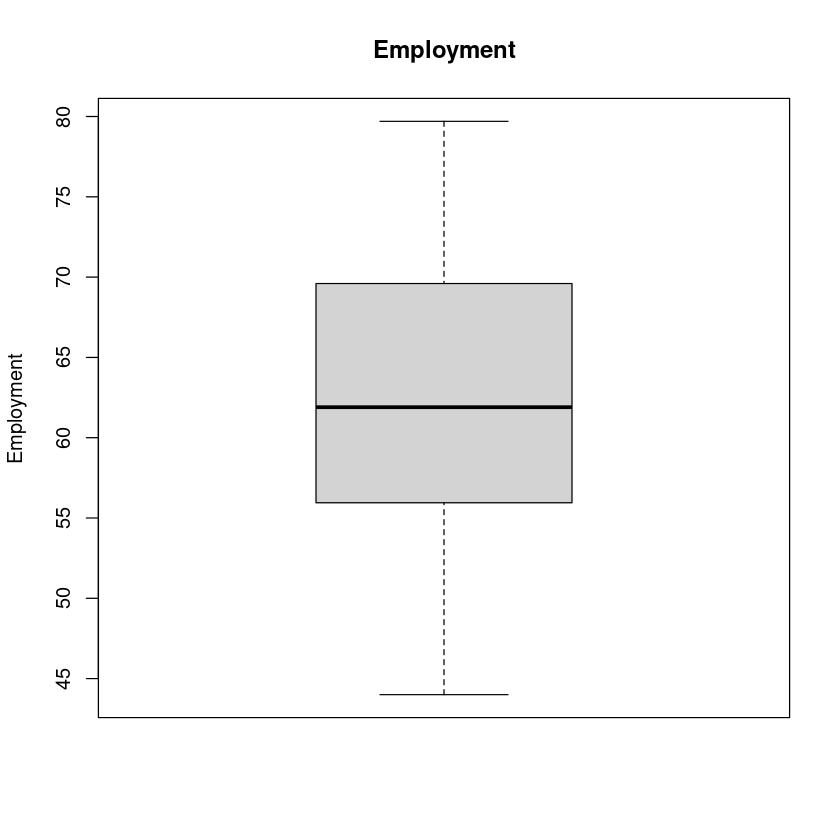

In [44]:
boxplot(df_big$Employment, main = "Employment", ylab = "Employment")

The summary statistics and the histogram for the *Employment* variable show that the employment rates across the countries are approximately normally distributed, with a mean of about 62.18% and a median of about 61.9%. The minimum and maximum employment rates are 44.0% and 79.7% respectively.
Boxplot, meanwhile, shows that there are no outliers in employment rates

**Inflation**:

In [45]:
summary(df_big$Inflation)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -0.700   2.375   2.800   3.083   3.425   9.000 

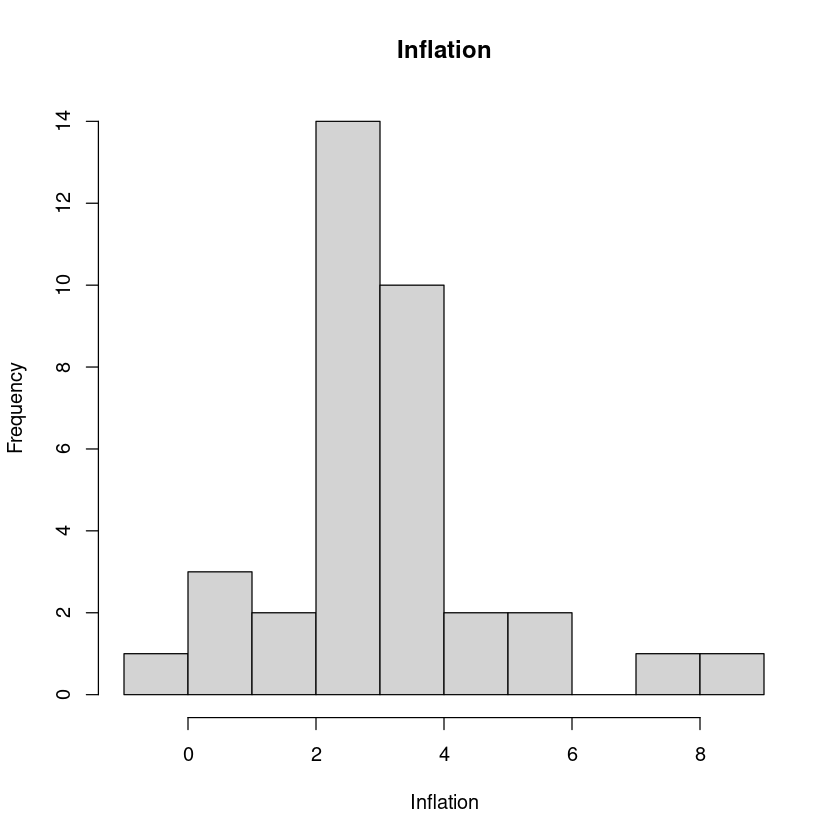

In [46]:
hist(df_big$Inflation, main = "Inflation", xlab = "Inflation", breaks = 10)

The summary statistics and the histogram for the *Inflation* variable show that the inflation rates across the countries are approximately normally distributed, with a mean of about 3.083% and a median of about 2.8%. The minimum and maximum inflation rates are -0.7% and 9.0% respectively.

**Education**

In [47]:
summary(df_big$Education)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  12.40   16.98   23.95   24.11   30.10   35.70 

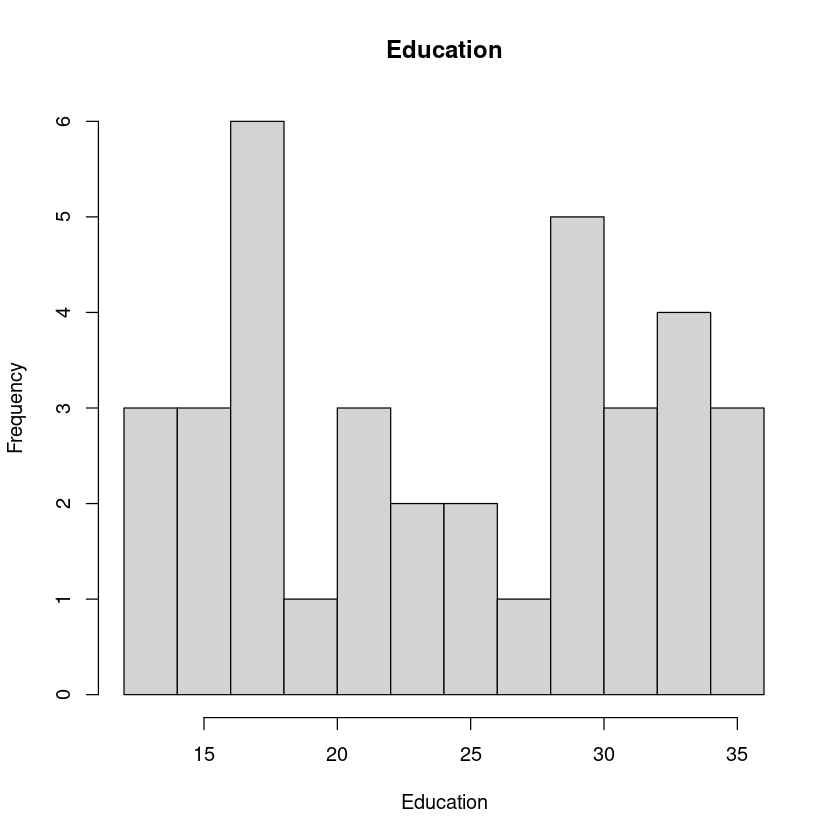

In [48]:
hist(df_big$Education, main = "Education", xlab = "Education", breaks = 10)

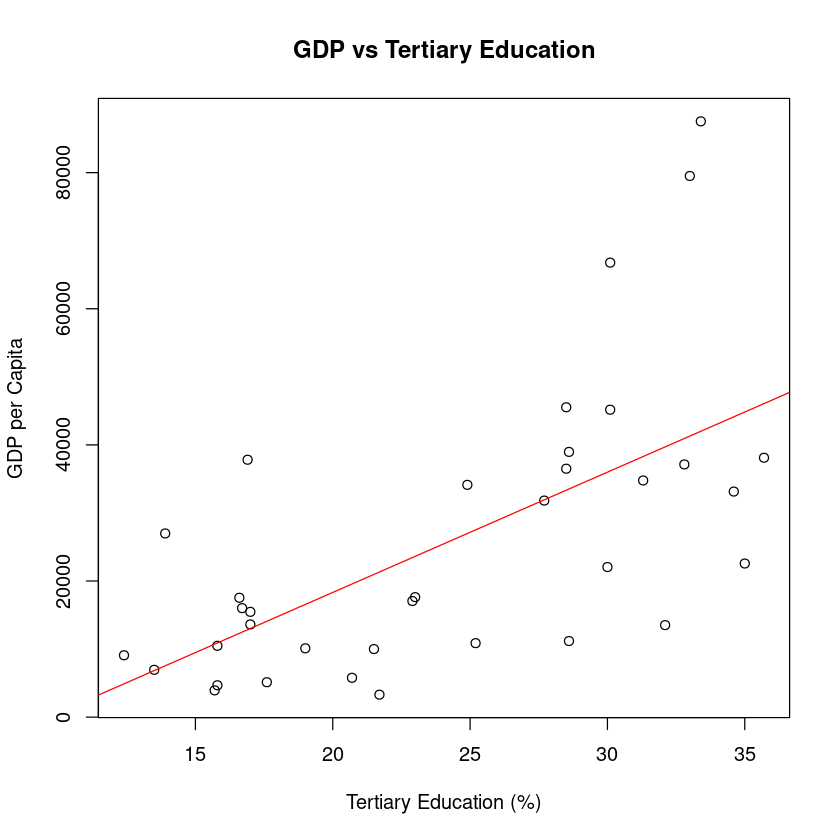

In [49]:
plot(df_big$Education, df_big$GDP, main = "GDP vs Tertiary Education", xlab = "Tertiary Education (%)", ylab = "GDP per Capita")
abline(lm(GDP ~ Education, data = df_big), col = "red")

The histogram shows the diversity of tertiary education levels among European countries. The scatter diagram confirms that there is a positive correlation between the level of tertiary education and GDP per capita. The statistics show that the average percentage of people with tertiary education is 24.11%, with a minimum of 12.40% and a maximum of 35.70%.

**Region**:

In [50]:
table(df_big$Region)


 Eastern Europe Northern Europe Southern Europe  Western Europe 
              6              10              13               7 

In [51]:
world <- ne_countries(scale = "medium", returnclass = "sf")

In [52]:
# extract values
df <- data.frame(
  geo = df_big$geo,
  Region = df_big$Region
)

In [53]:
df$geo <- unname(country_codes[df_big$geo])

In [54]:
world <- left_join(world, df, by = c("adm0_a3" = "geo"))

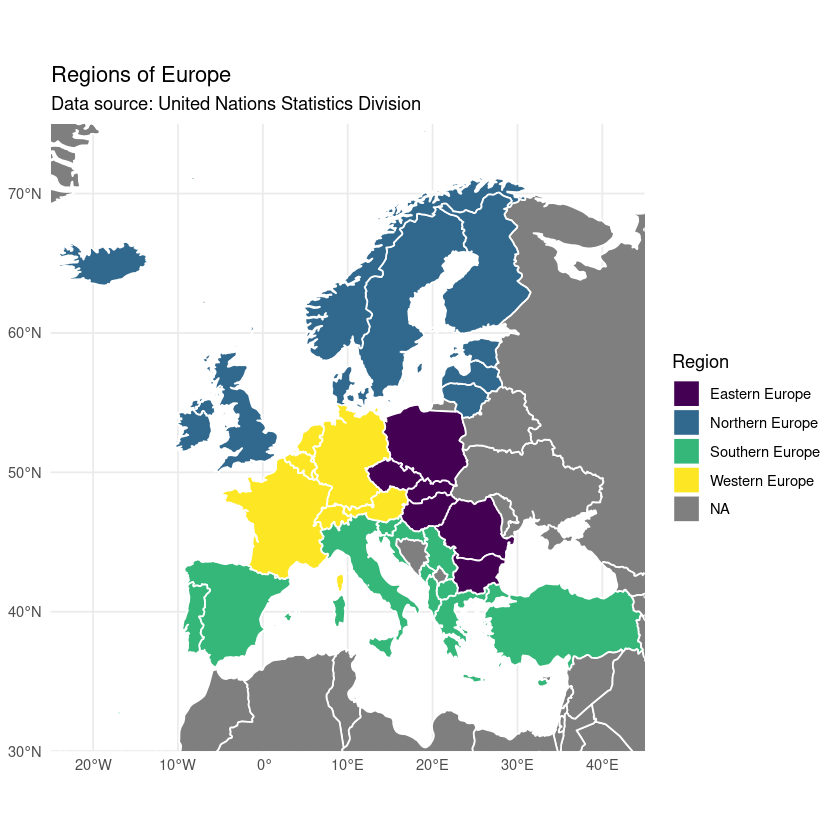

In [55]:
ggplot(data = world) +
  geom_sf(aes(fill = Region), color = "white", lwd = 0.5) +
  scale_fill_viridis_d(option = "viridis", na.value = "grey50", name = "Region") +
  theme_minimal() +
  labs(title = "Regions of Europe",
       subtitle = "Data source: United Nations Statistics Division") +
  coord_sf(xlim = c(-25, 45), ylim = c(30, 75), expand = FALSE)

---

> ##### Let's check the correlation between the regressors


For numeric continuous variables we will again use Spearman correlation test.
$H_0$: There is no monotonic relationship between the two variables. In other words, the Spearman correlation coefficient is zero.
$H_A$: There is a monotonic relationship between the two variables. In other words, the Spearman correlation coefficient is not zero.

In [56]:
cor.test(df_big$Education, df_big$Employment, method = "spearman")

Warning message in cor.test.default(df_big$Education, df_big$Employment, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  df_big$Education and df_big$Employment
S = 2954.8, p-value = 5.566e-05
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6197129 


Since the p-value is significantly less than 0.05, we reject the null hypothesis that the true correlation coefficient is zero. The calculated Spearman correlation coefficient of 0.62 indicates a moderately strong positive correlation between education level and employment.

In [57]:
cor.test(df_big$Education, df_big$Inflation, method = "spearman")

Warning message in cor.test.default(df_big$Education, df_big$Inflation, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  df_big$Education and df_big$Inflation
S = 10823, p-value = 0.01774
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.3929842 


Since the p-value is less than 0.05, we reject the null hypothesis that the true correlation coefficient is zero. The calculated Spearman correlation coefficient of -0.39 indicates a moderately strong negative correlation between the level of education and inflation.

In [58]:
cor.test(df_big$Employment, df_big$Inflation, method = "spearman")

Warning message in cor.test.default(df_big$Employment, df_big$Inflation, method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  df_big$Employment and df_big$Inflation
S = 9875.1, p-value = 0.11
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.2709224 


Since the p-value is greater than 0.05, we cannot reject the null hypothesis that the true correlation coefficient is zero. The calculated Spearman correlation coefficient of -0.27 indicates a weak negative correlation between employment and inflation, but this correlation is not statistically significant.

To investigate the relationship between the categorical variable Region and others numeric we use the Kruskal test.
$H_0$ : The median of numeric variable is the same across all regions of Europe.
$H_A$ : The median of numeric variable is different for at least one region of Europe.

In [59]:
kruskal.test(df_big$Employment ~ df_big$Region)


	Kruskal-Wallis rank sum test

data:  df_big$Employment by df_big$Region
Kruskal-Wallis chi-squared = 22.008, df = 3, p-value = 6.499e-05


Since the p-value is significantly less than 0.05, we reject the null hypothesis that the medians of the employment variable are the same for all regions of Europe. This indicates that there are significant differences in employment rates between different regions of Europe.

In [60]:
kruskal.test(df_big$Education ~ df_big$Region)


	Kruskal-Wallis rank sum test

data:  df_big$Education by df_big$Region
Kruskal-Wallis chi-squared = 17.48, df = 3, p-value = 0.0005629


Since the p-value is significantly less than 0.05, we reject the null hypothesis that the medians of educational attainment are the same for all regions of Europe. This indicates significant differences in educational attainment between different regions of Europe.

In [61]:
kruskal.test(df_big$Inflation ~ df_big$Region)


	Kruskal-Wallis rank sum test

data:  df_big$Inflation by df_big$Region
Kruskal-Wallis chi-squared = 7.1035, df = 3, p-value = 0.06867


Since the p-value is greater than 0.05, we cannot reject the null hypothesis that median inflation rates are the same for all regions of Europe. This indicates that there are no significant differences in inflation rates between different regions of Europe.

> The correlation tests revealed significant dependencies between some of the numeric regressors. For instance, there is a moderately strong positive correlation between education level and employment (ρ = 0.62). The Kruskal-Wallis tests also showed significant differences in employment and education levels across different regions of Europe.
>
> These findings indicate potential multicollinearity issues, which can affect the stability and interpretation of the regression model. Therefore, it is crucial to monitor the VIF values and possibly exclude some regressors from the final model to mitigate multicollinearity.


## Task 3:

##### Let's investigate GDP per capita dependence on all regressors

In [62]:
# Inclusion of all major first-order effects and interactions
full_model <- lm(GDP ~ (Education + Employment + Inflation + Region)^2, data = df_big)

In [63]:
# Performing stepwise regression analysis
best_model <- step(full_model)

Start:  AIC=688.8
GDP ~ (Education + Employment + Inflation + Region)^2

                       Df Sum of Sq        RSS    AIC
- Inflation:Region      3 210412657 2765510195 685.65
- Employment:Inflation  1    488030 2555585568 686.81
- Employment:Region     3 317034826 2872132364 687.01
- Education:Employment  1  46776536 2601874074 687.46
- Education:Inflation   1  72870365 2627967903 687.81
- Education:Region      3 461735807 3016833345 688.78
<none>                              2555097538 688.80

Step:  AIC=685.65
GDP ~ Education + Employment + Inflation + Region + Education:Employment + 
    Education:Inflation + Education:Region + Employment:Inflation + 
    Employment:Region

                       Df Sum of Sq        RSS    AIC
- Employment:Inflation  1   2796662 2768306857 683.69
- Education:Employment  1  51070901 2816581096 684.31
- Education:Region      3 437410646 3202920841 684.94
<none>                              2765510195 685.65
- Employment:Region     3 508177833 32

In this analysis, we constructed a full linear regression model including all main effects and interaction terms up to the first order. The model includes the variables Education, Employment, Inflation, and Region, as well as their pairwise interactions. Using the stepwise regression approach, we aim to identify the most significant predictors and interactions to explain the variability in GDP. This approach helps to avoid overfitting by removing non-significant predictors and simplifying the model. The Akaike Information Criterion (AIC) is used to guide the stepwise selection process.

In [64]:
summary(best_model)


Call:
lm(formula = GDP ~ Education + Employment + Inflation + Region + 
    Education:Inflation + Employment:Region, data = df_big)

Residuals:
   Min     1Q Median     3Q    Max 
-15900  -5948   -137   2605  40219 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)   
(Intercept)                      -61936.88   67859.91  -0.913  0.37011   
Education                          2074.65     641.38   3.235  0.00341 **
Employment                          650.39    1126.30   0.577  0.56880   
Inflation                          7718.13    3462.44   2.229  0.03503 * 
RegionNorthern Europe            -96251.20   79338.34  -1.213  0.23640   
RegionSouthern Europe              -691.67   73134.91  -0.009  0.99253   
RegionWestern Europe              78279.75   88446.71   0.885  0.38456   
Education:Inflation                -482.48     159.22  -3.030  0.00561 **
Employment:RegionNorthern Europe   1491.43    1277.67   1.167  0.25410   
Employment:RegionSouthern Eu

##### Interpretation of regression coefficients
> 1. Variables with significant coefficients:
> > **Education**: A significant positive coefficient (2074.65, p = 0.00341) indicates that an increase in educational attainment is associated with an increase in GDP per capita. When the percentage of the population with tertiary education increases by 1%, GDP per capita increases by 2074.65, holding other variables constant.
> > **Inflation**: A significant positive coefficient (7718.13, p = 0.03503) indicates that inflation also has a positive effect on GDP per capita. When inflation increases by 1%, GDP per capita increases by 7718.13, holding other variables constant.
> > **Education:Inflation**: A significant negative interaction (-482.48, p = 0.00561) indicates that GDP per capita decreases with increasing education and inflation. If inflation increases by 1% and the percentage of population with tertiary education increases by 1%, GDP per capita decreases by 482.48.
> 2. Variables with insignificant coefficients:
> > **Employment**: The insignificant coefficient (650.39, p = 0.56880) indicates that employment has no significant effect on GDP per capita in the context of this model.
> > **Region**: All coefficients for different regions are insignificant, which may indicate that there are no significant differences in GDP per capita between regions, after accounting for other variables.
> > **Employment:Region** All interactions between employment and regions are also insignificant.
> > **Intercept**: Also not significant

##### Model Quality Assessment
- Adjusted R-squared: A value of 0.688 indicates that the model explains 68.8% of the variability in the data. Considering the high variability in the data, as indicated by a large standard deviation of 20626.14 and a wide range of GDP per capita values (from 3300 to 87540), an Adjusted R-squared value of 0.688 is quite good
- F-statistic: A significant value of F-statistic (8.716, p = 5.888e-06) indicates that the model is generally significant and explains a significant portion of the variability in GDP per capita.

To test whether the simplified model (best_model) is statistically significantly better than the full model, we use ANOVA test.
$H_0$: The simplified model is not statistically significantly better than the full model.
$H_A$: The simplified model is statistically significantly better than the full model.

In [65]:
anova(full_model, best_model)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,17,2555097538,NA,NA,NA,NA
2,25,3318936346,-8,-763838808,0.6352624,0.7380598


Since the p-value is significantly greater than 0.05, we do not reject the null hypothesis. This means that the simplified model (best_model) is not statistically significantly better than the full model (full_model).

---

### Outliers

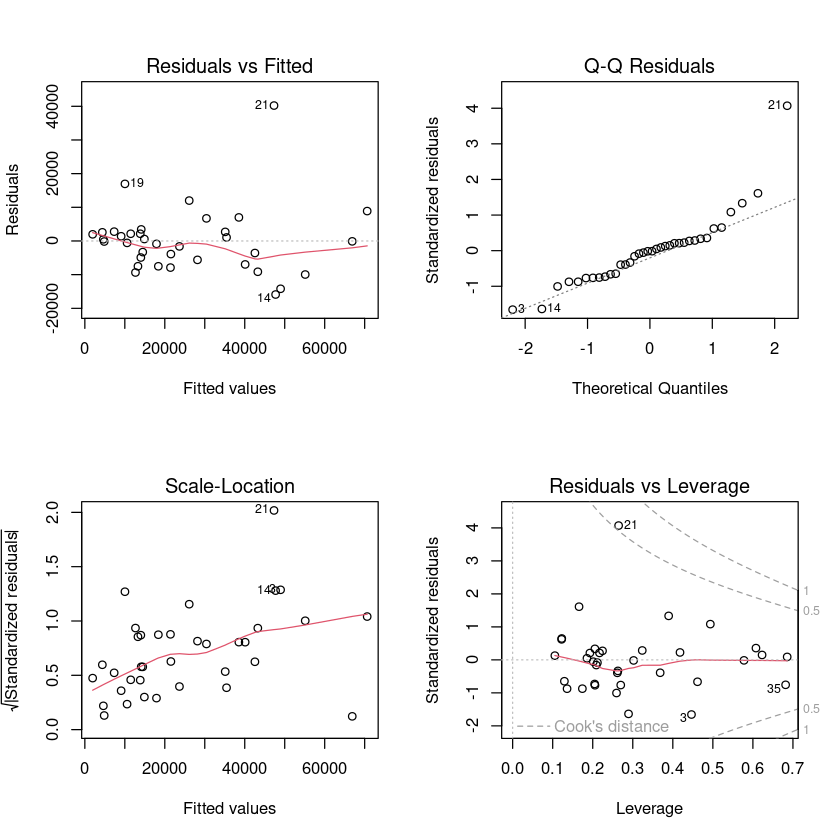

In [66]:
# diagnostic plots of the model
par(mfrow = c(2, 2))
plot(best_model)

# this will create 4 plots:
# 1. Residuals vs. Fitted - to check for linearity
# 2. Quantile plot (Normal Q-Q) - to check if the residuals are normal.
# 3. Scale-Location plot (Scale-Location) - to check homoscedasticity
# 4. Cook's Distance plot - to check the influence of samples

- Residuals vs Fitted: Observations 14, 19, and 21 are highlighted as potential outliers or high impact data.
- Q-Q Plot: The residuals mostly follow a linear line, except for a few observations (e.g., 21) that deviate from the line.
- Scale-Location: There is some trend in the residuals, which may indicate a heteroskedasticity problem (non-constant variance of the residuals).
- Residuals vs Leverage: Observations 21, 3 and 35 have high leverage values and stand out as potentially high leverage points.

In [67]:
# calculate Cook's Distance
cooksd <- cooks.distance(best_model)
print(cooksd)

           1            2            3            4            5            6 
1.092577e-02 3.538856e-03 2.012576e-01 1.248866e-02 2.785950e-05 3.432971e-02 
           7            8            9           10           11           12 
1.601942e-03 1.460300e-02 5.345313e-03 1.393002e-02 1.727704e-04 5.947727e-04 
          13           14           15           16           17           18 
4.893906e-03 9.922166e-02 1.764670e-04 1.966753e-03 1.031065e-01 3.320441e-03 
          19           20           21           22           23           24 
4.693519e-02 3.610462e-03 5.419992e-01 1.959692e-02 4.771389e-05 3.301413e-03 
          25           26           27           28           29           30 
2.628331e-03 8.074303e-03 1.040178e-01 6.951190e-05 9.361428e-04 1.788606e-02 
          31           32           33           34           35           36 
1.127594e-05 3.212278e-02 4.977944e-03 1.113944e-03 1.112731e-01 5.658510e-03 


In [68]:
# calculate Cook's Distance for each observation
cooksd <- cooks.distance(best_model)

n <- nrow(df_big)  # Total number of observations
k <- length(coef(best_model))  # Number of model parameters (including the intercept)
# an empirical rule to identify influential observations
threshold <- 4 / (n - k - 1)

# identify influential observations
influential <- as.numeric(names(cooksd)[(cooksd > threshold)])

print(influential)

[1]  3 21


- The results indicate the samples 3, 21 have a high influence on the model. We can consider removing these samples or apply, for example, robust linear regression.

### Multicollinearity

In [69]:
# Multicollinearity check using VIF
library(car)
vif_values <- vif(best_model)
vif_values_rounded <- round(vif_values, 3)

print(vif_values_rounded)

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif



                           GVIF Df GVIF^(1/(2*Df))
Education                 5.708  1           2.389
Employment               29.399  1           5.422
Inflation                10.026  1           3.166
Region              3730870.521  3          12.454
Education:Inflation       8.852  1           2.975
Employment:Region   4019489.654  3          12.609


- High multicollinearity is observed for the variables Employment, Region and the Employment:Region interaction. This may negatively affect the interpretation of the model and the stability of the coefficient estimates. We can consider excluding variables or using methods that are robust to multicollinearity, such as regularisation (e.g. Ridge regression).

### Homoscedasticity

We can test homoscedasticity of the residuals using Breusch-Pagan test.
$H_0$: The residuals are homoscedastic.
$H_A$: The residuals are heteroscedastic.

In [70]:
library(lmtest)

bptest(best_model)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric





	studentized Breusch-Pagan test

data:  best_model
BP = 12.645, df = 10, p-value = 0.2442


As the value is higher than 0.05, we cannot reject the null hypothesis of homoscedasticity. Thus, we can conclude that the assumption of homoscedasticity is not violated.

### Residuals

We will do Shapiro test to check if the residuals are normally distributed.
$H_0$: The residuals are normally distributed
$H_A$: The residuals are not normally distributed

In [71]:
shapiro.test(residuals(best_model))


	Shapiro-Wilk normality test

data:  residuals(best_model)
W = 0.84153, p-value = 0.0001222


As the p-value is much less than 0.05, we reject the null hypothesis.

### Autocorrelation

To test the independence of the residuals we use the Durbin-Watson test.
$H_0$: Model residuals are not autocorrelated (no autocorrelation).
$H_A$: The residuals of the model are autocorrelated (positive autocorrelation is present).

In [72]:
durbinWatsonTest(best_model)

 lag Autocorrelation D-W Statistic p-value
   1      -0.1879905      2.334954   0.228
 Alternative hypothesis: rho != 0

Based on the p-value of 0.186, which is higher than 0.05, we cannot reject the null hypothesis that the residuals of the model are not autocorrelated. Thus, we can conclude that there is no autocorrelation and the assumption of independence of the residuals is fulfilled.

---

### Application of methods that compensate for failure to fulfil assumptions

Conclusions on verification of model assumptions:
1. Normality of residuals: Not met.
2. Outliers: Present.
3. Multicollinearity: Detected.

> The first step is to try to transform the dependent variable to eliminate the normality problems of the residuals. For this purpose, we apply the Box-Cox test to determine the optimal transformation.


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




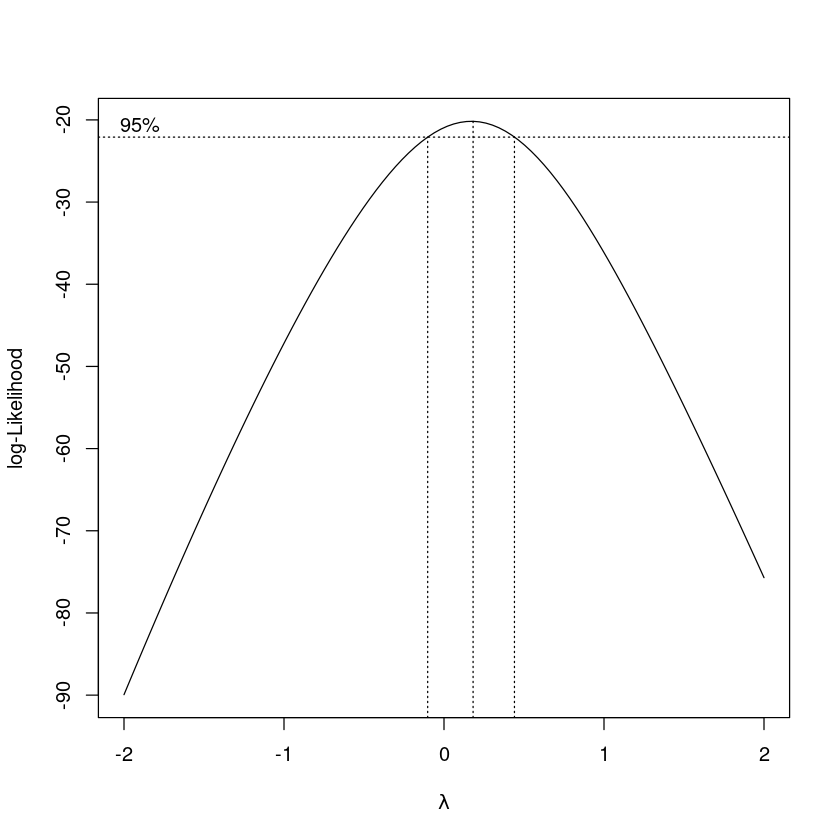

In [73]:
library(MASS)
boxcox_res <- boxcox(full_model)

In [74]:
best_lambda <- boxcox_res$x[which.max(boxcox_res$y)]
print(best_lambda)

[1] 0.1818182


The optimal value of λ is 0.1818182, and 0 is inside the confidence interval. This leads us to the logarithmic transformation, since the value of λ is around 0:

In [75]:
# Logarithmic transformation of the dependent variable
df_big$log_GDP <- log(df_big$GDP)

- We will start by training a robust regression model with all parameters and their interactions. Robust regression is particularly useful as it reduces the influence of outliers in the dataset.

In [76]:
robust_model <- rlm(log_GDP ~ (Education + Employment + Inflation + Region)^2, data = df_big, maxit = 50)

In [77]:
summary(robust_model)


Call: rlm(formula = log_GDP ~ (Education + Employment + Inflation + 
    Region)^2, data = df_big, maxit = 50)
Residuals:
      Min        1Q    Median        3Q       Max 
-1.227155 -0.033356 -0.009003  0.061091  0.946525 

Coefficients:
                                 Value   Std. Error t value
(Intercept)                       1.7087  1.7194     0.9938
Education                         0.3111  0.0697     4.4628
Employment                        0.1036  0.0298     3.4789
Inflation                        -0.0105  0.3686    -0.0286
RegionNorthern Europe            -7.2218  1.8024    -4.0069
RegionSouthern Europe            -1.8928  1.0925    -1.7327
RegionWestern Europe             -1.8934  2.0529    -0.9223
Education:Employment             -0.0047  0.0013    -3.6336
Education:Inflation              -0.0322  0.0067    -4.8288
Education:RegionNorthern Europe   0.1603  0.0304     5.2732
Education:RegionSouthern Europe   0.0755  0.0245     3.0871
Education:RegionWestern Europe    0.1102

In [78]:
vif_values <- vif(robust_model)
print(vif_values)

there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif



                             GVIF Df GVIF^(1/(2*Df))
Education            4.523389e+02  1       21.268261
Employment           1.379999e+02  1       11.747337
Inflation            7.621042e+02  1       27.606235
Region               6.324357e+07  3       19.960407
Education:Employment 1.078150e+03  1       32.835201
Education:Inflation  1.044295e+02  1       10.219076
Education:Region     4.769678e+05  3        8.839238
Employment:Inflation 5.325923e+02  1       23.077961
Employment:Region    2.874469e+07  3       17.502212
Inflation:Region     3.073800e+04  3        5.596879


- We calculated the Generalized Variance Inflation Factor (GVIF) for each predictor. The GVIF helps identify predictors with multicollinearity, where a GVIF value above 5 indicates potential multicollinearity. As we can see we have a strong mulcollinearity.
- Using a custom function, we will iteratively remove predictors with the highest GVIF values. This process will continue until all remaining predictors have GVIF values below the threshold, reducing multicollinearity in the model.

In [79]:
# Function to recalculate the model without the variable with the highest value GVIF^(1/(2*Df))
reduce_multicollinearity <- function(model, data) {
  repeat {
    vif_values <- vif(model)
    vif_values_rounded <- round(vif_values, 3)
    highest_vif <- max(vif_values_rounded[, 3])

    if (highest_vif > 5) {  # threshold for GVIF^(1/(2*Df))
      variable_to_remove <- rownames(vif_values_rounded)[which.max(vif_values_rounded[, 3])]
      formula_str <- paste(". ~ . -", variable_to_remove)
      new_formula <- as.formula(update(formula(model), formula_str))
      model <- update(model, new_formula)
    } else {
      break
    }
  }
  return(model)
}

In [80]:
final_model <- reduce_multicollinearity(robust_model, df_big)

there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif

there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif

there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif

there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif

there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif

there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif

there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif



In [81]:
vif(final_model, type = 'predictor')

GVIFs computed for predictors



,GVIF,Df,GVIF^(1/(2*Df)),Interacts With,Other Predictors
,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Employment,2.502441,1,1.581911,--,"Education, Inflation, Region"
Education,2.502441,7,1.067713,"Inflation, Region",Employment
Inflation,2.502441,7,1.067713,"Inflation, Region",Employment
Region,2.502441,7,1.067713,"Region, Inflation",Employment


- Based on the GVIF values in the provided output, it appears that there is no significant multicollinearity in our data. The GVIF values are all below the threshold of 5

In [82]:
AIC(robust_model)
AIC(final_model)

[1] 62.52646

[1] 53.70547

> We compared the initial robust regression model, which includes all possible interaction terms, with the final model obtained after reducing multicollinearity. The comparison was made using the Akaike Information Criterion (AIC).
>
> The AIC is a measure used to compare the relative quality of statistical models for a given dataset. It assesses the trade-off between the goodness of fit of the model and the complexity of the model (the number of parameters). A lower AIC value indicates a model that is likely to be closer to the true model.
>
> In this case, the AIC for the initial robust model with all variables was 62.53, while the AIC for the final model with reduced multicollinearity was 53.71. Since the AIC for the final model is lower, it suggests that the final model is better, achieving a good balance between fit and complexity. This indicates that the final model is more appropriate for our data than the initial model.

---

### Testing regressors for statistical significance

In [83]:
library(sfsmisc)


Attaching package: ‘sfsmisc’


The following object is masked from ‘package:dplyr’:

    last




We will the function f.robtest from the sfsmisc library, which returns a robust test of whether one or more regressors can be omitted
$H_0$: The specified regressor can be omitted from the model (i.e., its coefficient is equal to zero).
$H_A$: The specified regressor cannot be omitted from the model (i.e., its coefficient is not equal to zero).

In [84]:
f.robftest(final_model,var="Employment")


	robust F-test (as if non-random weights)

data:  from rlm(formula = log_GDP ~ Employment + Education:Inflation + Education:Region + from     Inflation:Region, data = df_big, maxit = 50)
F = 23.017, p-value = 5.248e-05
alternative hypothesis: true Employment is not equal to 0


In [85]:
f.robftest(final_model,var="Education:RegionNorthern Europe")


	robust F-test (as if non-random weights)

data:  from rlm(formula = log_GDP ~ Employment + Education:Inflation + Education:Region + from     Inflation:Region, data = df_big, maxit = 50)
F = 9.5276, p-value = 0.004641
alternative hypothesis: true Education:RegionNorthern Europe is not equal to 0


In [86]:
f.robftest(final_model,var="Education:RegionSouthern Europe")


	robust F-test (as if non-random weights)

data:  from rlm(formula = log_GDP ~ Employment + Education:Inflation + Education:Region + from     Inflation:Region, data = df_big, maxit = 50)
F = 4.606, p-value = 0.04101
alternative hypothesis: true Education:RegionSouthern Europe is not equal to 0


In [87]:
f.robftest(final_model,var="Education:RegionWestern Europe")


	robust F-test (as if non-random weights)

data:  from rlm(formula = log_GDP ~ Employment + Education:Inflation + Education:Region + from     Inflation:Region, data = df_big, maxit = 50)
F = 4.0611, p-value = 0.05394
alternative hypothesis: true Education:RegionWestern Europe is not equal to 0


In [88]:
f.robftest(robust_model,var="Education:Inflation")


	robust F-test (as if non-random weights)

data:  from rlm(formula = log_GDP ~ (Education + Employment + Inflation + from     Region)^2, data = df_big, maxit = 50)
F = 27.783, p-value = 6.241e-05
alternative hypothesis: true Education:Inflation is not equal to 0


In [89]:
f.robftest(robust_model,var="Inflation:RegionNorthern Europe")


	robust F-test (as if non-random weights)

data:  from rlm(formula = log_GDP ~ (Education + Employment + Inflation + from     Region)^2, data = df_big, maxit = 50)
F = 1.8002, p-value = 0.1973
alternative hypothesis: true Inflation:RegionNorthern Europe is not equal to 0


In [90]:
f.robftest(robust_model,var="Inflation:RegionSouthern Europe")


	robust F-test (as if non-random weights)

data:  from rlm(formula = log_GDP ~ (Education + Employment + Inflation + from     Region)^2, data = df_big, maxit = 50)
F = 1.7079, p-value = 0.2087
alternative hypothesis: true Inflation:RegionSouthern Europe is not equal to 0


In [91]:
f.robftest(robust_model,var="Inflation:RegionWestern Europe")


	robust F-test (as if non-random weights)

data:  from rlm(formula = log_GDP ~ (Education + Employment + Inflation + from     Region)^2, data = df_big, maxit = 50)
F = 1.2591, p-value = 0.2774
alternative hypothesis: true Inflation:RegionWestern Europe is not equal to 0


- The robust F-test results showed that the interaction term between Inflation and Region was not significant. To confirm whether removing this term improves the model, we compared the Akaike Information Criterion (AIC) for models with and without this term.

In [92]:
final_model_without_insignificant <- rlm(log_GDP ~ (Employment + Education:Region + Education:Inflation), data = df_big, maxit = 50)

In [93]:
summary(final_model_without_insignificant)


Call: rlm(formula = log_GDP ~ (Employment + Education:Region + Education:Inflation), 
    data = df_big, maxit = 50)
Residuals:
     Min       1Q   Median       3Q      Max 
-1.15893 -0.24420  0.03921  0.22037  0.88345 

Coefficients:
                                Value   Std. Error t value
(Intercept)                      6.0516  0.7945     7.6169
Employment                       0.0536  0.0134     3.9924
Education:RegionEastern Europe   0.0099  0.0242     0.4094
Education:RegionNorthern Europe  0.0270  0.0157     1.7194
Education:RegionSouthern Europe  0.0293  0.0189     1.5529
Education:RegionWestern Europe   0.0371  0.0174     2.1309
Education:Inflation             -0.0032  0.0024    -1.3529

Residual standard error: 0.3522 on 29 degrees of freedom

In [94]:
AIC(final_model)

[1] 53.70547

In [106]:
AIC(final_model_without_insignificant)

[1] 54.62738

- It turned out that the AIC for the model without this regressor is a bit bigger, so we decided to keep it in the final model.

---

### Re-evaluating the assumptions

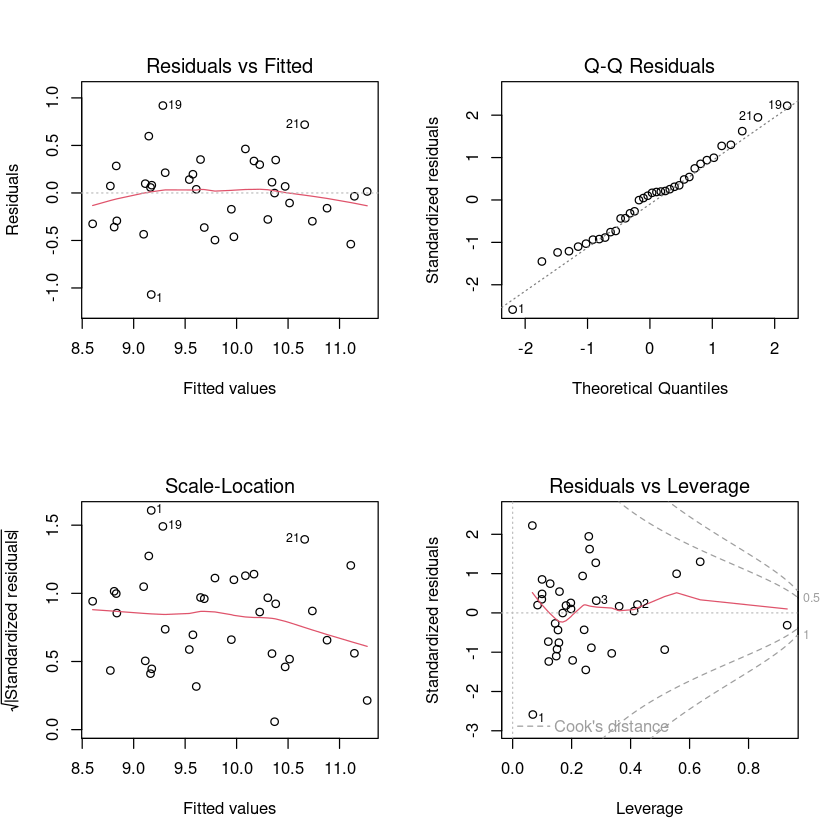

In [96]:
par(mfrow = c(2, 2))
plot(final_model)

> The graphs look promising, let's run some tests.

Shapiro test to check if the residuals are normally distributed.
$H_0$: The residuals are normally distributed
$H_A$: The residuals are not normally distributed

In [97]:
shapiro.test(residuals(final_model))


	Shapiro-Wilk normality test

data:  residuals(final_model)
W = 0.98229, p-value = 0.8199


Test homoscedasticity of the residuals using Breusch-Pagan test.
$H_0$: The residuals are homoscedastic.
$H_A$: The residuals are heteroscedastic.

In [98]:
bptest(final_model)


	studentized Breusch-Pagan test

data:  final_model
BP = 6.0498, df = 8, p-value = 0.6417


To test the independence of the residuals we use the Durbin-Watson test.
$H_0$: Model residuals are not autocorrelated (no autocorrelation).
$H_A$: The residuals of the model are autocorrelated (positive autocorrelation is present).

In [99]:
durbinWatsonTest(final_model)

 lag Autocorrelation D-W Statistic p-value
   1      -0.1212361      2.027859    0.81
 Alternative hypothesis: rho != 0

- All tests showed a p value greater than 0.05, which means we cannot reject the null hypothesis that the assumptions are violated.

### Assessment of the final model

In [100]:
summary(final_model)


Call: rlm(formula = log_GDP ~ Employment + Education:Inflation + Education:Region + 
    Inflation:Region, data = df_big, maxit = 50)
Residuals:
     Min       1Q   Median       3Q      Max 
-1.06887 -0.29466  0.04811  0.23073  0.91952 

Coefficients:
                                Value   Std. Error t value
(Intercept)                      5.6179  0.7705     7.2910
Employment                       0.0595  0.0125     4.7663
Education:Inflation              0.0005  0.0036     0.1457
Education:RegionNorthern Europe  0.0358  0.0117     3.0617
Education:RegionSouthern Europe  0.0227  0.0106     2.1391
Education:RegionWestern Europe   0.0294  0.0147     2.0051
Inflation:RegionNorthern Europe -0.2175  0.1311    -1.6585
Inflation:RegionSouthern Europe -0.0043  0.0553    -0.0783
Inflation:RegionWestern Europe   0.0317  0.1554     0.2037

Residual standard error: 0.4282 on 27 degrees of freedom

##### Coefficients Interpretation:
The coefficients of the model are interpreted as follows: each coefficient represents the change in the logarithm of GDP when the corresponding predictor changes by one unit, assuming that the other variables remain unchanged. To translate these changes into percentage changes in the original GDP scale, an exponential function can be used. For example:
- Intercept (5.6179): When all predictor variables are at zero, the expected value of log_GDP is 5.6179. Back-transforming to the original scale:
exp^(5.6179)≈276 meaning the baseline GDP is approximately 276 units.
- Employment (0.0595): For each one-unit increase in Employment, holding other variables constant, the log_GDP increases by 0.0595. In percentage terms: exp^(0.0595)−1≈0.061 or approximately a 6.1% increase in GDP for each additional unit of employment.

For the other variables, the interpretation is similar.

In [101]:
# Function for calculating pseudo R-squared
pseudo_r_squared <- function(model) {
  fitted_values <- model$fitted.values
  residuals <- model$residuals
  total_sum_of_squares <- sum((df_big$log_GDP - mean(df_big$log_GDP))^2)
  residual_sum_of_squares <- sum(residuals^2)
  explained_sum_of_squares <- total_sum_of_squares - residual_sum_of_squares
  pseudo_r2 <- explained_sum_of_squares / total_sum_of_squares
  return(pseudo_r2)
}

In [102]:
# Function to calculate adjusted pseudo R-squared
adjusted_pseudo_r_squared <- function(model, pseudo_r2) {
  n <- length(model$fitted.values)  # Number of observations
  p <- length(model$coefficients)  # Number of predictors (including intersept)
  adjusted_r2 <- 1 - (1 - pseudo_r2) * ((n - 1) / (n - p))
  return(adjusted_r2)
}

In [103]:
r2 <- pseudo_r_squared(final_model)
adjusted_r2 <- adjusted_pseudo_r_squared(final_model, r2)

In [104]:
print(r2)
print(adjusted_r2)

[1] 0.7894821
[1] 0.7271064


For robust regression models, traditional R-squared values are not typically provided. Therefore, we calculated a pseudo R-squared value, which provides a measure of how well the model explains the variability of the dependent variable. This pseudo R-squared is calculated similarly to the traditional R-squared but uses the sum of squared residuals from the robust model.

Additionally, we computed the adjusted pseudo R-squared, which accounts for the number of predictors in the model, providing a more accurate measure of model fit, especially when multiple predictors are involved.
- **Pseudo R-squared** (0.789): This indicates that about 78.9% of the variability in the log-transformed GDP is explained by the predictors in the robust regression model. This is a relatively high value, suggesting that the model fits the data well.
- **Adjusted pseudo R-squared** (0.727): This adjusted value is slightly lower, at 72.7%, which accounts for the complexity of the model (i.e., the number of predictors). This value indicates that, even when adjusting for the number of predictors, the model still explains a substantial portion of the variability in the data.

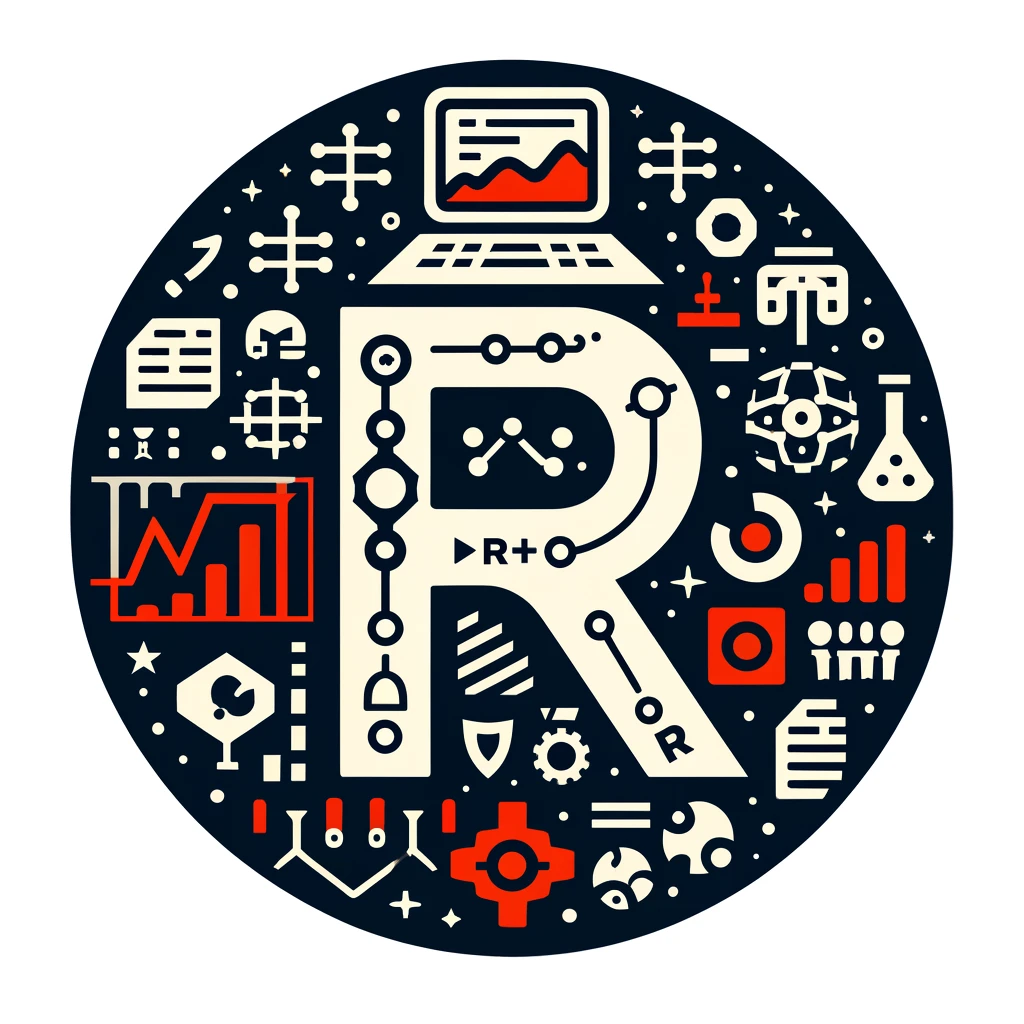

In [105]:
library(IRdisplay)
display_jpeg(file="./bonus.webp")
# we asked gpt chat to create a logo for BI_PRS